In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [2]:
df = pd.read_csv("alexa.csv")


In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nids6\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nids6\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
def preprocess_text(text):
    if pd.isnull(text):  # Check if the value is NaN
        return ""  # Return empty string for NaN values
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)


In [5]:
df['clean_review'] = df['Review'].apply(preprocess_text)


In [6]:
df['sentiment_score'] = df['clean_review'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [7]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['clean_review'])

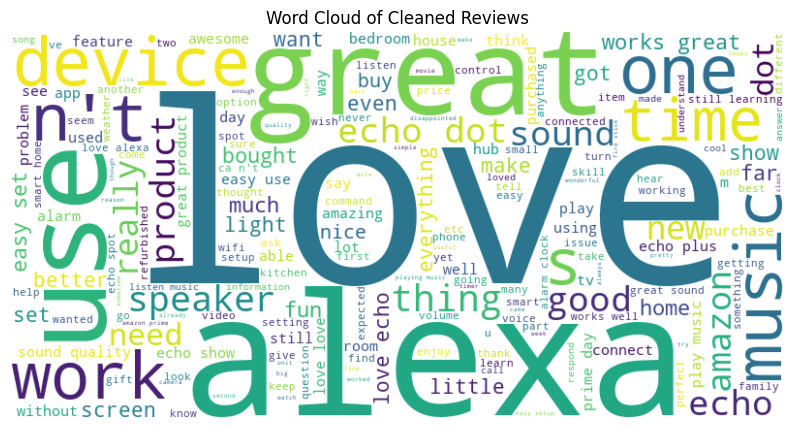

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned reviews into a single string
all_clean_reviews = ' '.join(df['clean_review'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_clean_reviews)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Reviews')
plt.show()


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, df['Liked'], test_size=0.2, random_state=42)

In [10]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC()
}

In [11]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Performance:")
    print(classification_report(y_test, y_pred))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      0.02      0.03        58
           1       0.91      1.00      0.95       572

    accuracy                           0.91       630
   macro avg       0.95      0.51      0.49       630
weighted avg       0.92      0.91      0.87       630

Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      0.33      0.49        58
           1       0.94      1.00      0.97       572

    accuracy                           0.94       630
   macro avg       0.97      0.66      0.73       630
weighted avg       0.94      0.94      0.92       630

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.60      0.52      0.56        58
           1       0.95      0.97      0.96       572

    accuracy                           0.92       630
   macro avg       0.78      0.74      0.

Confusion matrix

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns



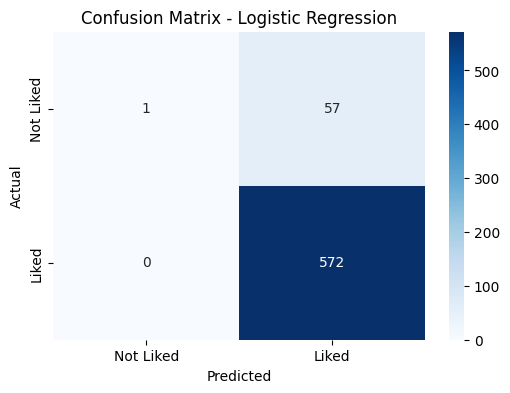

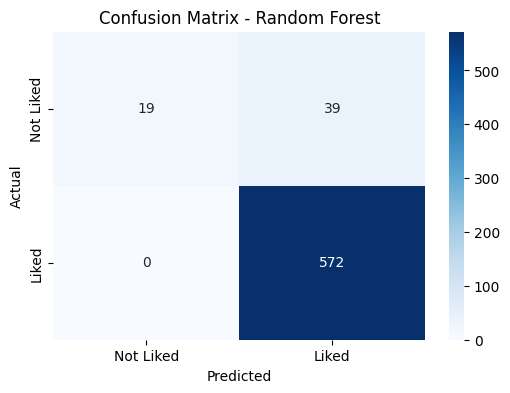

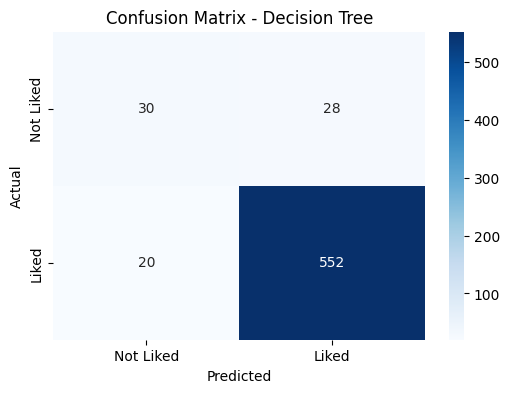

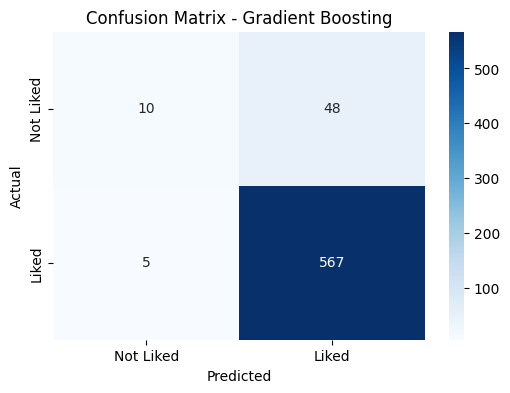

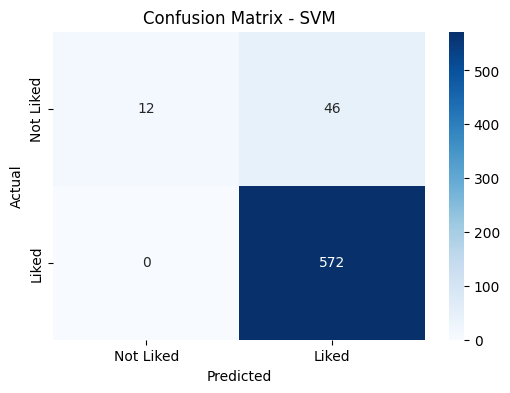

In [13]:
# Plot confusion matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Liked', 'Liked'], yticklabels=['Not Liked', 'Liked'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

Accuracy for each

In [14]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")


Logistic Regression Accuracy: 0.9095
Random Forest Accuracy: 0.9381
Decision Tree Accuracy: 0.9317
Gradient Boosting Accuracy: 0.9175
SVM Accuracy: 0.9270


ROC Curve

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



In [16]:
# Initialize and train models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True)
}


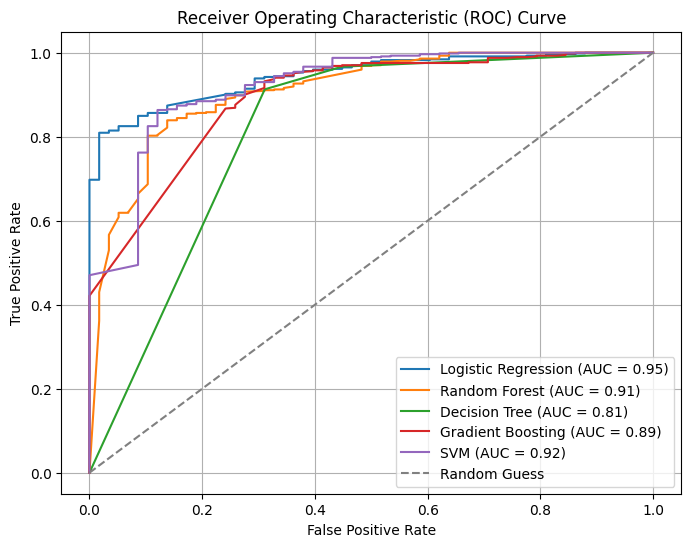

In [17]:
# Plot ROC curves for each model
plt.figure(figsize=(8, 6))
for name, model in models.items():
    if name == 'SVM':
        y_score = model.fit(X_train, y_train).decision_function(X_test)
    else:
        y_score = model.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()

